# Problem Statement

To perform classification analysis on Iris dataset. Perform any two classification algorithms and compare the accuracy.


# Importing Modules

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#reading data
df = pd.read_csv(r'C:\Users\KIIT\Desktop\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the Id column because it will not help us in prediction
df=df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Display statistics about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Displaying info about the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Calculating no. of samples in each class
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

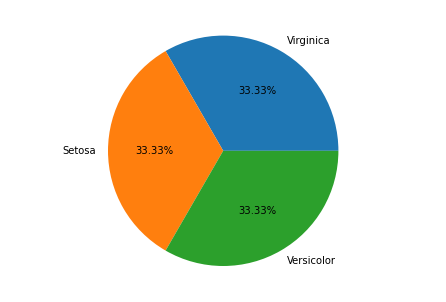

In [7]:
#Visual representation of distribution of data in iris dataset 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Virginica', 'Setosa', 'Versicolor']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

# Preprocessing of dataset

In [8]:
#Checking if there are any null values present
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null values are present.

# Exploratory Data Analysis

#####  Plot histograms

<AxesSubplot:>

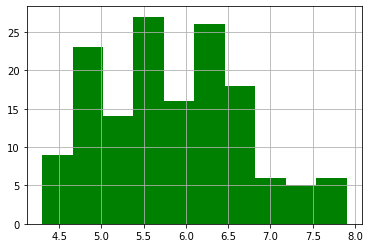

In [9]:
df['SepalLengthCm'].hist(color='green')

<AxesSubplot:>

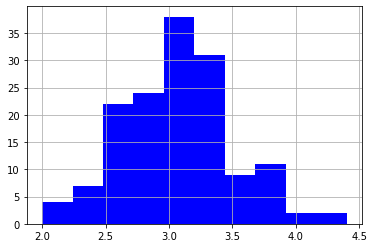

In [10]:
df['SepalWidthCm'].hist(color='blue')

<AxesSubplot:>

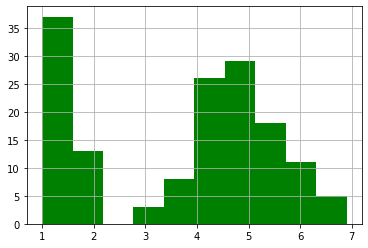

In [11]:
df['PetalLengthCm'].hist(color='green')

<AxesSubplot:>

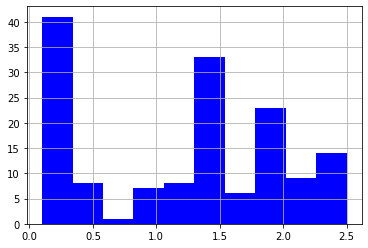

In [12]:
df['PetalWidthCm'].hist(color='blue')

##### Plotting the Scatterplot

In [13]:
colors=['red','green','yellow']
species=['Iris-setosa','Iris-virginica' ,'Iris-versicolor']

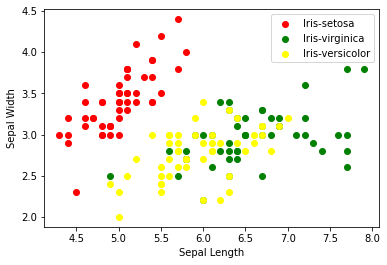

In [14]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

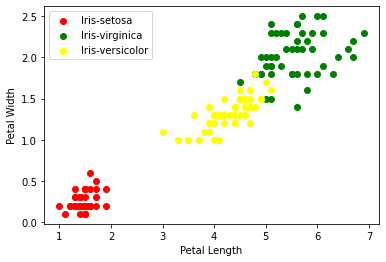

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

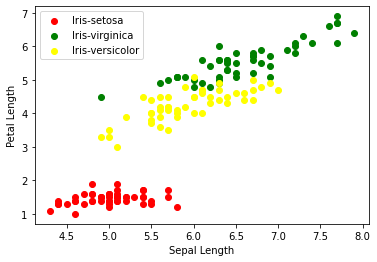

In [16]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

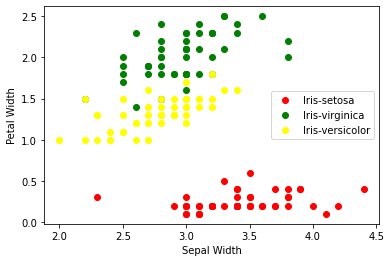

In [17]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

# Correlation 

In [18]:
#calculating correlation between two features
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

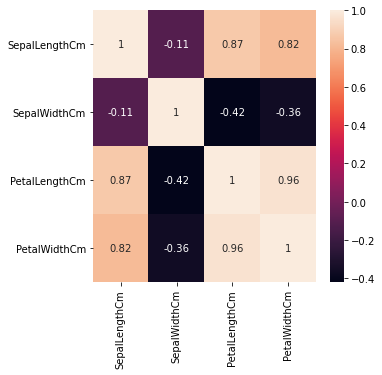

In [19]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)

# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train-Test data Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

# Classification 

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred= lr.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2])

In [27]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  4, 17]], dtype=int64)

In [30]:
#calculating the accuracy of Logistic Regression
print("Training accuracy :", lr.score(x_train, y_train)*100)
print("Testing accuracy :", lr.score(x_test, y_test)*100)

Training accuracy : 97.77777777777777
Testing accuracy : 91.66666666666666


#### K Nearest Neighbour

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k = KNeighborsClassifier(n_neighbors=3)
k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred= k.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2])

In [34]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 18]], dtype=int64)

In [36]:
#calculating the accuracy of KNN-Classification
print("Training accuracy :", k.score(x_train, y_train)*100)
print("Testing accuracy :", k.score(x_test, y_test)*100)

Training accuracy : 98.88888888888889
Testing accuracy : 93.33333333333333


# Accuracy Score Comparison based on different Prediction Models

In [37]:
results = pd.DataFrame({
    'Model Names': ['Logistic Regression','K-Nearest Neighbour'],
    'Score': [91.67,93.34]})

result_df = results.sort_values(by='Score', ascending=True)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model Names
Score,
91.67,Logistic Regression
93.34,K-Nearest Neighbour


# Conclusion

Between the two techniques, the results show that k-Nearest Neighbor Method is better than Logistic Regression Algorithm in terms of predictive accuracy.